 # Imports:

In [32]:
import os
import logging
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from IPython import get_ipython
if type(get_ipython()).__name__ == 'ZMQInteractiveShell':  # IPython Notebook!
    get_ipython().run_line_magic('matplotlib', 'inline')  # '%matplotlib inline'
    get_ipython().run_line_magic('load_ext', 'autoreload')  # '%load_ext autoreload'
    get_ipython().run_line_magic('autoreload', '2')  # '%autoreload 2' (reloads everything)
# Change working directory to file location:
os.chdir(R'C:\Users\Jan\Projects\mlalfa\scripts')
_log = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 # Pretty dictionary printer:

In [33]:
def print_dict(dictionary, title=None):
    if title:
        print(title)
    for key, value in dictionary.items():
        print(f'{key:<25}:\t{value}', end='\n')



 # Define test function:

In [34]:
def test(y_predict, y_test, verbose=1):
    errors = np.sum([yp != yt for yp, yt in zip(y_predict, y_test)])
    error_rate = errors/len(y_test)
    ys = np.vstack((y_predict, y_test)).T
    if verbose:
        if verbose > 1:
            print(ys)
        print(f'Errors: {errors} of {len(y_test)} tests are wrong!')
        print(f'Error%: {error_rate*100:.2g}%')
    return error_rate



 # Load Data:

In [35]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)



 # Linear Regression:

In [36]:
model_linreg = LinearRegression()
print_dict(model_linreg.get_params(), 'LinearRegressor params:')
model_linreg.fit(X_train, y_train)
y_predict_linreg = model_linreg.predict(X_test)
y_predict_linreg = np.round(y_predict_linreg).astype(int)  # Regressor -> classifier!
error_rate_linreg = test(y_predict_linreg, y_test)
print(f'Linear Regressor score: {model_linreg.score(X_test, y_test):.3g}')



LinearRegressor params:
copy_X                   :	True
fit_intercept            :	True
n_jobs                   :	None
normalize                :	False
Errors: 4 of 120 tests are wrong!
Error%: 3.3%
Linear Regressor score: 0.921


 # Naive Bayesian:

In [37]:
model_bayes = CategoricalNB()
print_dict(model_bayes.get_params(), 'CategoricalNB params:')
model_bayes.fit(X_train, y_train)
y_predict_bayes = model_bayes.predict(X_test)
error_rate_bayes = test(y_predict_bayes, y_test)
print(f'Naive Bayesian score: {model_bayes.score(X_test, y_test):.3g}')



CategoricalNB params:
alpha                    :	1.0
class_prior              :	None
fit_prior                :	True
Errors: 9 of 120 tests are wrong!
Error%: 7.5%
Naive Bayesian score: 0.925


 # NearestNeighbors:

In [38]:
model_nn = KNeighborsClassifier()
print_dict(model_nn.get_params(), 'KNeighborsClassifier params:')
model_nn.fit(X_train, y_train)
y_predict_nn = model_nn.predict(X_test)
error_rate_nn = test(y_predict_nn, y_test)
print(f'Nearest Neighbors score: {model_nn.score(X_test, y_test):.3g}')



KNeighborsClassifier params:
algorithm                :	auto
leaf_size                :	30
metric                   :	minkowski
metric_params            :	None
n_jobs                   :	None
n_neighbors              :	5
p                        :	2
weights                  :	uniform
Errors: 8 of 120 tests are wrong!
Error%: 6.7%
Nearest Neighbors score: 0.933


 # DecisionTree:

DecisionTreeClassifier params:
ccp_alpha                :	0.0
class_weight             :	None
criterion                :	gini
max_depth                :	None
max_features             :	None
max_leaf_nodes           :	None
min_impurity_decrease    :	0.0
min_impurity_split       :	None
min_samples_leaf         :	1
min_samples_split        :	2
min_weight_fraction_leaf :	0.0
presort                  :	deprecated
random_state             :	None
splitter                 :	best
Errors: 10 of 120 tests are wrong!
Error%: 8.3%
Decision Tree score: 0.917


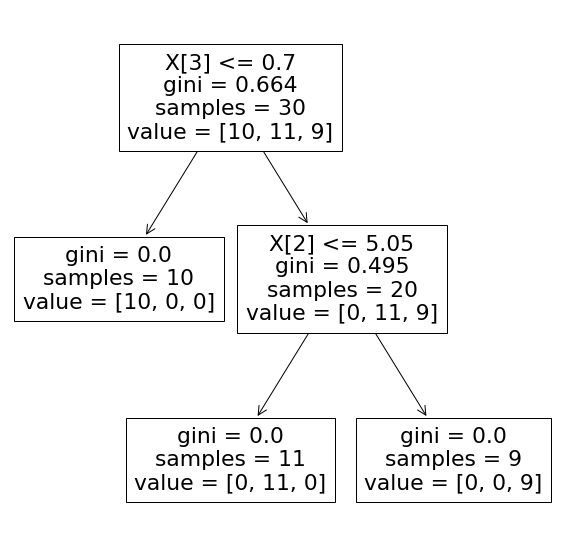

In [39]:
model_tree = DecisionTreeClassifier()
print_dict(model_tree.get_params(), 'DecisionTreeClassifier params:')
model_tree.fit(X_train, y_train)
y_predict_tree = model_tree.predict(X_test)
error_rate_tree = test(y_predict_tree, y_test)
print(f'Decision Tree score: {model_tree.score(X_test, y_test):.3g}')
plt.figure(figsize=(10, 10))
plot_tree(model_tree)
plt.show()



 # SVM:

In [40]:
model_svm = SVC()
print_dict(model_svm.get_params(), 'SVC params:')
model_svm.fit(X_train, y_train)
y_predict_svm = model_svm.predict(X_test)
error_rate_svm = test(y_predict_svm, y_test)
print(f'Support Vector Machine score: {model_svm.score(X_test, y_test):.3g}')



SVC params:
C                        :	1.0
break_ties               :	False
cache_size               :	200
class_weight             :	None
coef0                    :	0.0
decision_function_shape  :	ovr
degree                   :	3
gamma                    :	scale
kernel                   :	rbf
max_iter                 :	-1
probability              :	False
random_state             :	None
shrinking                :	True
tol                      :	0.001
verbose                  :	False
Errors: 10 of 120 tests are wrong!
Error%: 8.3%
Support Vector Machine score: 0.917


 # SUMMARY:

In [41]:
print(f'Error Rate Linear Regression:      {error_rate_linreg*100:.2f}%')
print(f'Error Rate Naive Bayes:            {error_rate_bayes*100:.2f}%')
print(f'Error Rate Nierest Neighbor:       {error_rate_nn*100:.2f}%')
print(f'Error Rate Decision Tree:          {error_rate_tree*100:.2f}%')
print(f'Error Rate Support Vector Machine: {error_rate_svm*100:.2f}%')


Error Rate Linear Regression:      3.33%
Error Rate Naive Bayes:            7.50%
Error Rate Nierest Neighbor:       6.67%
Error Rate Decision Tree:          8.33%
Error Rate Support Vector Machine: 8.33%
